## 1. Импорт библиотек

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 2. Загрузка данных

In [95]:
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print(f"Размер датасета: {df.shape[0]:,} строк")
for i, name in enumerate(housing.feature_names, 1):
    print(f"  {i}. {name}")
print(f"\nЦель: MedHouseVal (стоимость в $100,000)")

df.head(10)

Размер датасета: 20,640 строк
  1. MedInc
  2. HouseAge
  3. AveRooms
  4. AveBedrms
  5. Population
  6. AveOccup
  7. Latitude
  8. Longitude

Цель: MedHouseVal (стоимость в $100,000)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [96]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 3. Анализ корреляции

In [97]:
correlation_matrix = df.corr()
price_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)

print("Корреляция со стоимостью дома:\n")
for feature, corr in price_corr.items():
    if feature != 'MedHouseVal':
        print(f"{feature:12} {corr:>6.3f}")

Корреляция со стоимостью дома:

MedInc        0.688
AveRooms      0.152
HouseAge      0.106
AveOccup     -0.024
Population   -0.025
Longitude    -0.046
AveBedrms    -0.047
Latitude     -0.144


## 4. Графики зависимостей

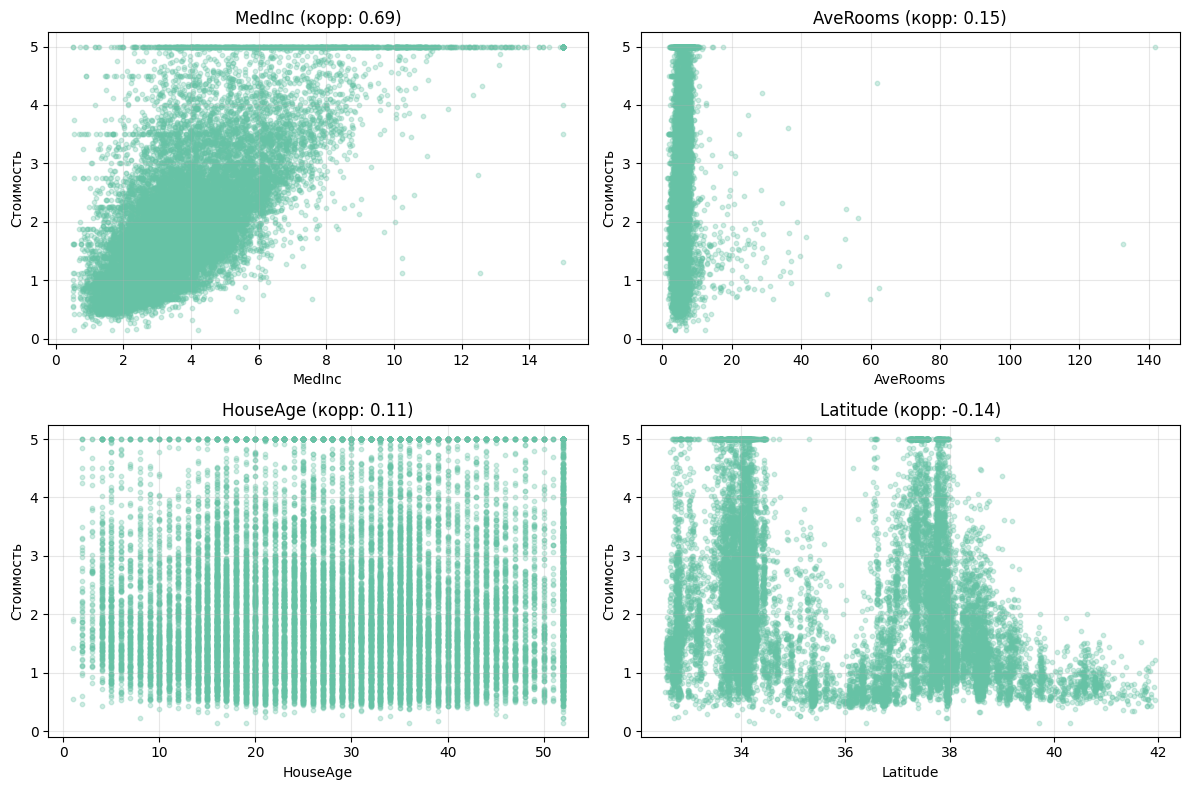

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
top_features = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude']

for ax, feature in zip(axes.flatten(), top_features):
    ax.scatter(df[feature], df['MedHouseVal'], alpha=0.3, s=10)
    ax.set_xlabel(feature)
    ax.set_ylabel('Стоимость')
    corr = df[feature].corr(df['MedHouseVal'])
    ax.set_title(f'{feature} (корр: {corr:.2f})')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Создание категориальных признаков (One-Hot Encoding)

Преобразуем HouseAge в категории: "новый", "средний", "старый"

In [107]:
df['AgeCategory'] = pd.cut(df['HouseAge'], 
                            bins=[0, 10, 30, 100], 
                            labels=['New', 'Middle', 'Old'])

print("Распределение по категориям возраста:\n")
print(df['AgeCategory'].value_counts())

df_encoded = pd.get_dummies(df, columns=['AgeCategory'], prefix='Age',)

Распределение по категориям возраста:

AgeCategory
Middle    9576
Old       9495
New       1569
Name: count, dtype: int64


In [108]:
df_encoded.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Age_New,Age_Middle,Age_Old
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,False,False,True
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,False,True,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,False,False,True
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,False,False,True
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,False,False,True


## 6. Подготовка данных - версия 1 (базовая)

In [109]:
features_basic = ['MedInc', 'HouseAge', 'AveRooms', 'Age_Middle', 'Age_Old', 'Age_New']

X_basic = df_encoded[features_basic]
y = df['MedHouseVal']

X_train_b, X_test_b, y_train, y_test = train_test_split(X_basic, y, test_size=0.2, random_state=42)

print(f"Базовая модель: {len(features_basic)} признаков")
print(f"Train: {X_train_b.shape[0]:,} | Test: {X_test_b.shape[0]:,}")

Базовая модель: 6 признаков
Train: 16,512 | Test: 4,128


## 7. Модель 1: БЕЗ скейлинга

In [110]:
model_base = LinearRegression()
model_base.fit(X_train_b, y_train)
y_pred_base = model_base.predict(X_test_b)

r2_base = r2_score(y_test, y_pred_base)
mae_base = mean_absolute_error(y_test, y_pred_base)

print(f"R²:   {r2_base:.4f}")
print(f"MAE:  ${mae_base*100:.2f}k")

R²:   0.4990
MAE:  $60.11k


## 8. Модель 2: StandardScaler

In [111]:
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_b)
X_test_std = scaler_std.transform(X_test_b)

model_std = LinearRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)

r2_std = r2_score(y_test, y_pred_std)
mae_std = mean_absolute_error(y_test, y_pred_std)

print(f"R²:   {r2_std:.4f}")
print(f"MAE:  ${mae_std*100:.2f}k")

R²:   0.4990
MAE:  $60.11k


## 9. Модель 3: RobustScaler (устойчив к выбросам!)

**RobustScaler** использует медиану вместо среднего - лучше работает когда есть выбросы

In [112]:
scaler_rob = RobustScaler()
X_train_rob = scaler_rob.fit_transform(X_train_b)
X_test_rob = scaler_rob.transform(X_test_b)

model_rob = LinearRegression()
model_rob.fit(X_train_rob, y_train)
y_pred_rob = model_rob.predict(X_test_rob)

r2_rob = r2_score(y_test, y_pred_rob)
mae_rob = mean_absolute_error(y_test, y_pred_rob)

print(f"R²:   {r2_rob:.4f}")
print(f"MAE:  ${mae_rob*100:.2f}k")

R²:   0.4990
MAE:  $60.11k


## 10. Сравнение скейлеров

In [113]:
comparison = pd.DataFrame({
    'Скейлер': ['Без скейлинга', 'StandardScaler', 'RobustScaler'],
    'R²': [r2_base, r2_std, r2_rob],
    'MAE ($k)': [mae_base*100, mae_std*100, mae_rob*100]
})

print(comparison.to_string(index=False))

       Скейлер       R²  MAE ($k)
 Без скейлинга 0.498999 60.107655
StandardScaler 0.498999 60.107655
  RobustScaler 0.498999 60.107655


## 11. График сравнения

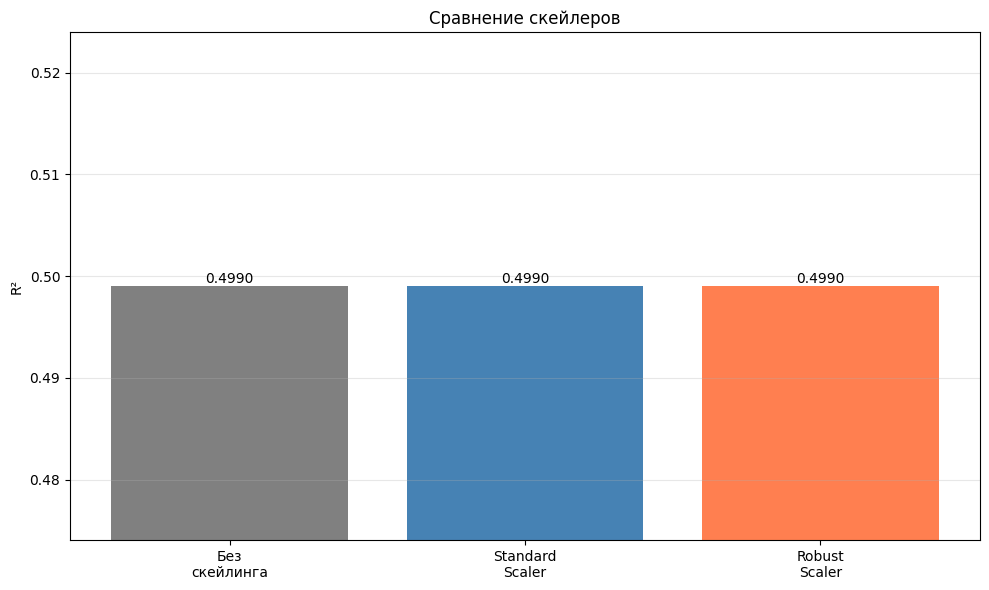

In [114]:
models = ['Без\nскейлинга', 'Standard\nScaler', 'Robust\nScaler']
r2_values = [r2_base, r2_std, r2_rob]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_values, color=['gray', 'steelblue', 'coral'])
plt.ylabel('R²')
plt.title('Сравнение скейлеров')
plt.ylim([min(r2_values)*0.95, max(r2_values)*1.05])
plt.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 12. Модель 4: С One-Hot Encoding

In [ ]:
features_encoded = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Age_Middle', 'Age_Old', 'Age_New']

X_enc = df_encoded[features_encoded]
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_enc, y, test_size=0.2, random_state=42)

scaler_e = StandardScaler()
X_train_e_scaled = scaler_e.fit_transform(X_train_e)
X_test_e_scaled = scaler_e.transform(X_test_e)

model_enc = LinearRegression()
model_enc.fit(X_train_e_scaled, y_train_e)
y_pred_enc = model_enc.predict(X_test_e_scaled)

r2_enc = r2_score(y_test_e, y_pred_enc)
mae_enc = mean_absolute_error(y_test_e, y_pred_enc)

print(f"R²:   {r2_enc:.4f}")
print(f"MAE:  ${mae_enc*100:.2f}k")

R²:   0.4972
MAE:  $60.33k


## 13. Модель 5: С Polynomial Features (УЛУЧШАЕТ результат!)

**Polynomial Features** создаёт взаимодействия между признаками: x1*x2, x1², x2² и т.д.

In [122]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_b)
X_test_poly = poly.transform(X_test_b)

print(f"Было признаков: {X_train_b.shape[1]}")
print(f"Стало признаков: {X_train_poly.shape[1]}")

scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

model_poly = LinearRegression()
model_poly.fit(X_train_poly_scaled, y_train)
y_pred_poly = model_poly.predict(X_test_poly_scaled)

r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"R²:   {r2_poly:.4f}")
print(f"MAE:  ${mae_poly*100:.2f}k")

Было признаков: 6
Стало признаков: 27
R²:   0.5150
MAE:  $58.66k


## 14. Финальное сравнение всех моделей

In [123]:
final_comparison = pd.DataFrame({
    'Модель': [
        'Базовая (без скейлинга)',
        'StandardScaler',
        'RobustScaler',
        'One-Hot Encoding',
        'Polynomial Features'
    ],
    'Признаков': [4, 4, 4, 6, 14],
    'R²': [r2_base, r2_std, r2_rob, r2_enc, r2_poly],
    'MAE ($k)': [mae_base*100, mae_std*100, mae_rob*100, mae_enc*100, mae_poly*100]
})

print(final_comparison.to_string(index=False))

                 Модель  Признаков       R²  MAE ($k)
Базовая (без скейлинга)          4 0.498999 60.107655
         StandardScaler          4 0.498999 60.107655
           RobustScaler          4 0.498999 60.107655
       One-Hot Encoding          6 0.497172 60.332136
    Polynomial Features         14 0.515027 58.664014


## 15. График прогресса

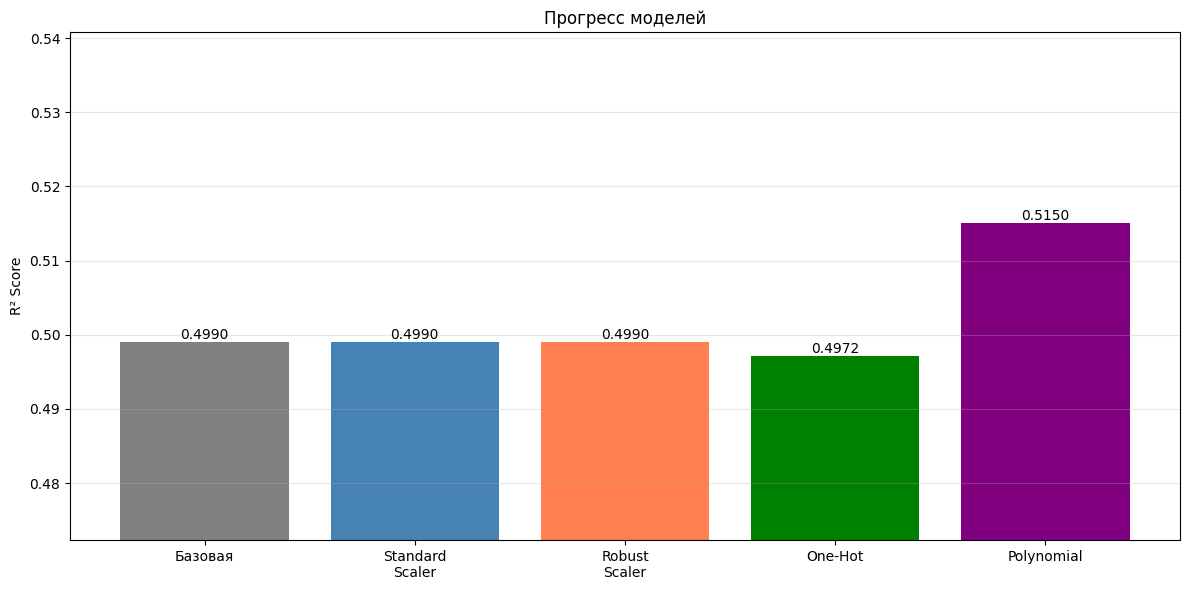

In [124]:
plt.figure(figsize=(12, 6))

models_list = ['Базовая', 'Standard\nScaler', 'Robust\nScaler', 'One-Hot', 'Polynomial']
r2_list = [r2_base, r2_std, r2_rob, r2_enc, r2_poly]
colors_list = ['gray', 'steelblue', 'coral', 'green', 'purple']

bars = plt.bar(models_list, r2_list, color=colors_list)
plt.ylabel('R² Score')
plt.title('Прогресс моделей')
plt.ylim([min(r2_list)*0.95, max(r2_list)*1.05])
plt.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, r2_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 16. Predicted vs Actual (лучшая модель)

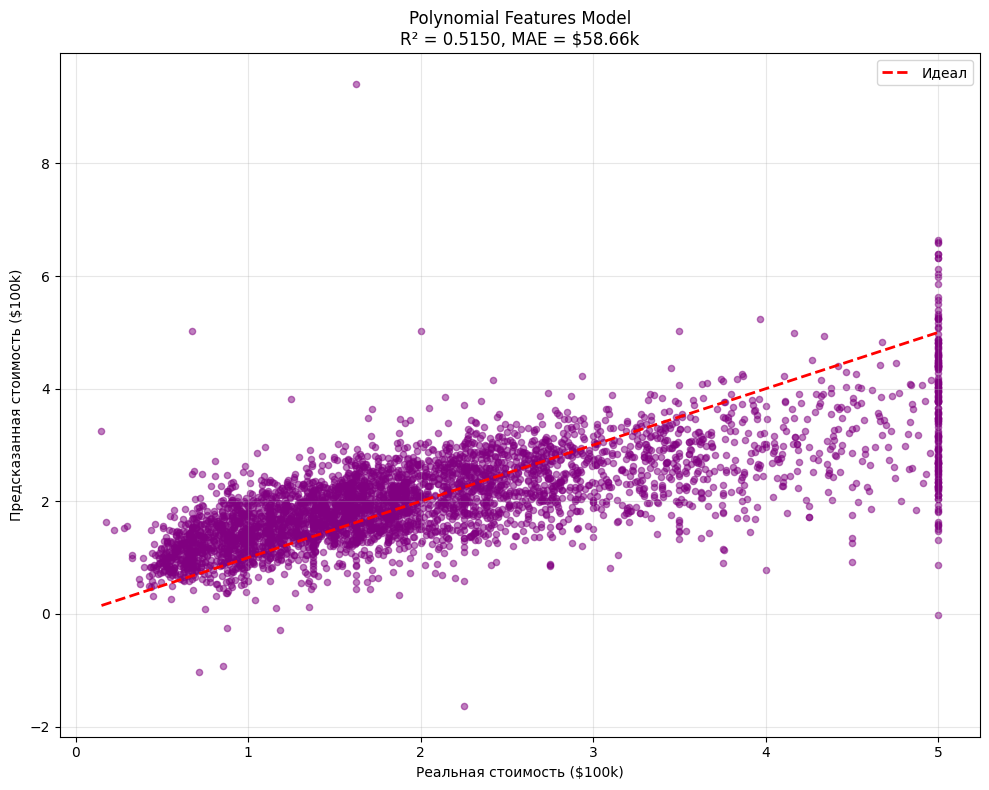

In [125]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred_poly, alpha=0.5, s=20, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Идеал')

plt.xlabel('Реальная стоимость ($100k)')
plt.ylabel('Предсказанная стоимость ($100k)')
plt.title(f'Polynomial Features Model\nR² = {r2_poly:.4f}, MAE = ${mae_poly*100:.2f}k')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

<Axes: xlabel='MedHouseVal', ylabel='Count'>

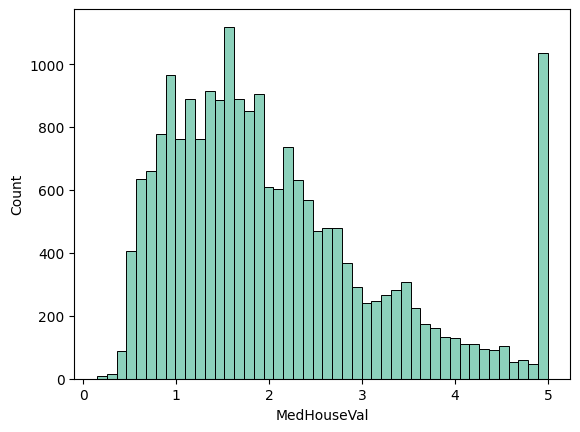

In [128]:
sns.histplot(df['MedHouseVal'])

In [129]:
df[df['MedHouseVal'] > 4.6].value_counts()

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup   Latitude  Longitude  MedHouseVal  AgeCategory
0.4999   28.0      7.677419   1.870968   142.0       4.580645   34.15     -118.08    5.00001      Middle         1
         29.0      2.373272   1.055300   2690.0      12.396313  34.02     -118.28    5.00001      Middle         1
0.7025   19.0      2.425197   1.125984   1799.0      2.833071   35.30     -120.67    5.00001      Middle         1
0.8543   27.0      2.297872   1.175532   1211.0      1.610372   37.78     -122.42    5.00001      Middle         1
0.9000   52.0      2.237474   1.053535   3260.0      2.237474   37.80     -122.41    5.00001      Old            1
                                                                                                                ..
15.0001  52.0      8.907583   1.099526   1407.0      3.334123   34.08     -118.39    5.00001      Old            1
                   9.204969   1.062112   531.0       3.298137   34.07     -118.33    

In [130]:
df.shape

(20640, 10)